In [4]:
# Step 1: Imports and Path Setup
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Correct Dataset Path (deepest folder containing A-Z folders)
train_dir = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'


In [5]:
# Step 2: Data Loading and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [6]:
# Step 3: Build the CNN Model
num_classes = train_gen.num_classes  # should be 29

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-05 13:12:32.178446: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,605 (4.89 MB)

 Trainable params: 1,280,605 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 4: Train the Model (for 3 epochs - test run)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=3
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 859s 787ms/step - accuracy: 0.4629 - loss: 1.8151 - val_accuracy: 0.7307 - val_loss: 0.9852
Epoch 2/3
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 321s 295ms/step - accuracy: 0.9230 - loss: 0.2331 - val_accuracy: 0.7618 - val_loss: 0.9949
Epoch 3/3
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 300s 275ms/step - accuracy: 0.9636 - loss: 0.1114 - val_accuracy: 0.7744 - val_loss: 1.1585


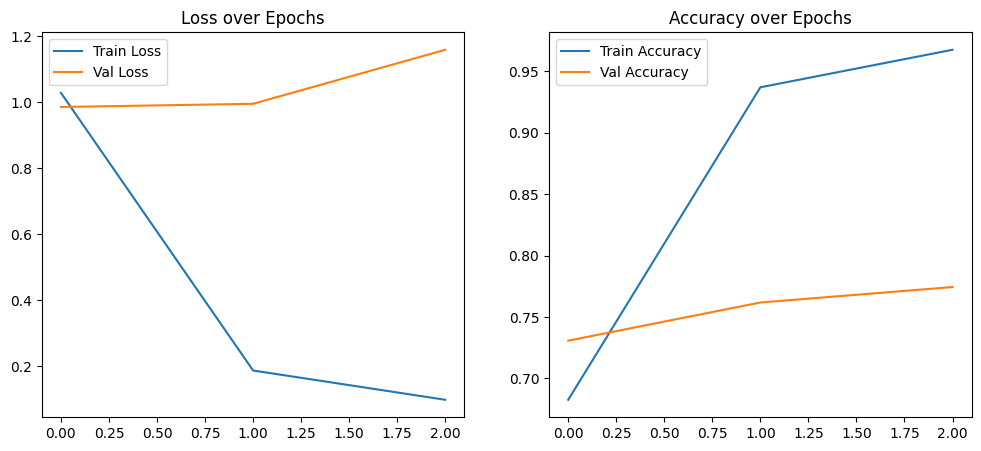

In [8]:
# Step 5: Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()


In [11]:
# Step 6: Save the Trained Model (for final submission)
model.save('asl_cnn_model_3epochs.h5')


In [12]:
from tensorflow.keras.models import load_model
model = load_model('/kaggle/working/asl_cnn_model_3epochs.h5')


In [14]:
import cv2
from tensorflow.keras.preprocessing import image

# Load a test image (pick any image from a known class)
img_path = '/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/A_test.jpg'  # Change to actual image
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Model expects batch

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)

# Map index to label
labels = list(train_gen.class_indices.keys())
print("Predicted Class:", labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicted Class: A


In [16]:
import cv2
from tensorflow.keras.preprocessing import image

# Load a test image (pick any image from a known class)
img_path = '/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/Z_test.jpg'  # Actual Image path
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Model expects batch

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)

# Map index to label
labels = list(train_gen.class_indices.keys())
print("Predicted Class:", labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class: Z
